<a href="https://colab.research.google.com/github/lucapqg/Deep-learning/blob/main/MNIST_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import random 
import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Conv2D,Dense,MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist


In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_train = x_train.astype('float32') / 255.0

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

In [ ]:
optimizer = SGD(learning_rate=0.01,momentum=0.9)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2222 - accuracy: 0.9321
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0737 - accuracy: 0.9774
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0477 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0343 - accuracy: 0.9896
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0256 - accuracy: 0.9922
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0183 - accuracy: 0.9945
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0136 - accuracy: 0.9959
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0103 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0076 - accuracy: 0.9980
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [ ]:
image = random.choice(x_test)

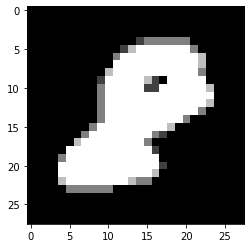

In [ ]:
plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
image = (image.reshape((1,28,28,1))).astype('float32') / 255.0
digit = np.argmax(model.predict(image),axis=1)[0]
print('Prediction ->',digit)

Prediction -> 8
